In [1]:
import scanpy as sc
import numpy as np

import matplotlib.pyplot as plt


Used the SeuratData SeuratDisk Seurat utilities to convert it to anndata https://mojaveazure.github.io/seurat-disk/articles/convert-anndata.html

In [2]:
ddir = '/u/home/f/f7xiesnm/project-zipursky/v1-bb/v1/data/fly_lplc/fly_lplc_mark.h5ad'
adata = sc.read(ddir)
adata

/u/home/f/f7xiesnm/.conda/envs/napari/lib/python3.9/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 2579 × 1000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Perc_MT', 'Perc_RP', 'is_sng', 'genotype', 'group', 'sex', 'RNA_snn_res.0.1', 'seurat_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances'

In [3]:
ts = adata.obsm['X_tsne']
ps = adata.obsm['X_pca']
clsts = adata.obs['seurat_clusters'].values
cclsts = np.char.add('C',clsts.astype('str'))
ts

array([[ 24.63882874,  -4.98886949],
       [  3.54947532,   5.44435216],
       [ -3.98182618, -32.76208482],
       ...,
       [  7.45289076, -35.07355829],
       [ 15.59331927,  21.19281388],
       [ 13.39391931, -27.31274374]])

In [4]:
ps.shape

(2579, 100)

In [5]:
adata.obs['seurat_clusters'].unique(), adata.obs['group'].unique(), adata.obs['orig.ident'].unique()

(array([3, 0, 1, 2, 4], dtype=int32),
 array(['late', 'early'], dtype=object),
 array([0], dtype=int32))

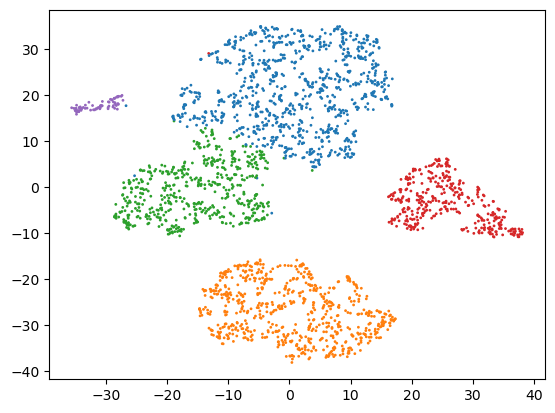

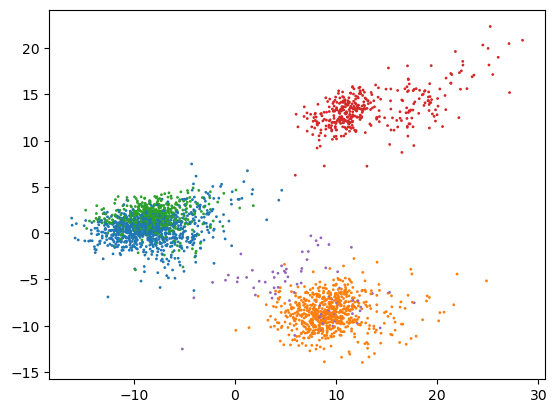

In [6]:
plt.scatter(ts[:,0], ts[:,1], c=cclsts, s=1)
plt.show()
plt.scatter(ps[:,0], ps[:,1], c=cclsts, s=1)
plt.show()

# analyze cluster 0 and cluster 2 only
- select those cells - and then apply the P28NR pipeline
    - find highly variable genes
    - redo PCA and plot
    - shuffle within each cluster and check 